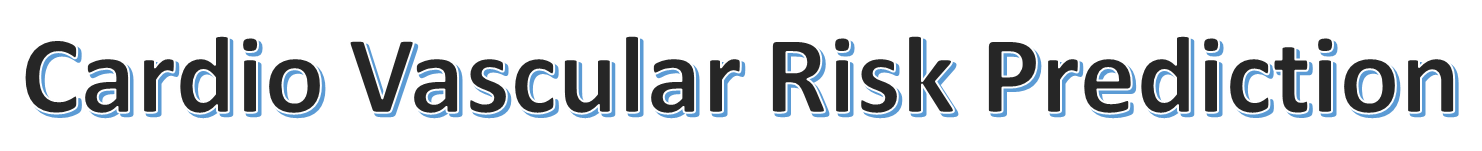

# Synopsis:

1. Import Libraries
2. Read Dataset
3. Check Dataset info
4. Dataset Pre-pruning
5. Missing Value Treatment
6. Feature Engineering - One hot encoding
7. Descriptive Analysis
8. Outlier Treatment
9. Imbalance Data treatment
10. Independent Variable Correlation check - Heatmap
11. Exploratory Data Analysis

# Import Libraries

In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Read Dataset

In [68]:
df = pd.read_csv('data_cardiovascular_risk.csv')

In [69]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [70]:
df.shape

(3390, 17)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

# Dataset Pre-Pruning or Dropping unwanted features

In [72]:
df.drop(['id','is_smoking','education'], axis = 1,inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   cigsPerDay       3368 non-null   float64
 3   BPMeds           3346 non-null   float64
 4   prevalentStroke  3390 non-null   int64  
 5   prevalentHyp     3390 non-null   int64  
 6   diabetes         3390 non-null   int64  
 7   totChol          3352 non-null   float64
 8   sysBP            3390 non-null   float64
 9   diaBP            3390 non-null   float64
 10  BMI              3376 non-null   float64
 11  heartRate        3389 non-null   float64
 12  glucose          3086 non-null   float64
 13  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 370.9+ KB


# Missing Value Treatment

In [74]:
df.isnull().sum()*100/len(df)

age                0.000000
sex                0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

In [75]:
df.isnull().sum()

age                  0
sex                  0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [76]:
df.cigsPerDay.unique()

array([ 3.,  0., 10., 20., 30., 35., 40., 15.,  9., 60., 17., 25.,  5.,
       43.,  7., 50., 19., 18.,  1., 45.,  2.,  6., nan, 11.,  8.,  4.,
       14., 16., 23., 13., 12., 70., 38.])

In [77]:
df.BPMeds.unique()

array([ 0., nan,  1.])

In [78]:
df.totChol.unique()

array([221., 212., 250., 233., 241., 272., 238., 295., 220., 326.,  nan,
       210., 213., 227., 188., 240., 257., 267., 232., 199., 175., 164.,
       226., 248., 245., 279., 273., 252., 198., 266., 216., 237., 193.,
       293., 180., 206., 215., 208., 262., 270., 292., 346., 202., 340.,
       334., 351., 235., 243., 196., 275., 186., 190., 268., 234., 264.,
       156., 260., 225., 183., 246., 174., 288., 254., 150., 211., 161.,
       274., 214., 195., 165., 302., 265., 251., 205., 209., 258., 222.,
       247., 189., 173., 281., 382., 181., 200., 244., 218., 261., 229.,
       291., 312., 170., 176., 290., 204., 239., 162., 314., 194., 271.,
       313., 305., 285., 169., 224., 201., 185., 307., 179., 280., 219.,
       391., 300., 253., 345., 278., 282., 255., 191., 439., 327., 287.,
       236., 332., 207., 230., 155., 335., 325., 223., 231., 197., 184.,
       310., 157., 228., 166., 303., 320., 163., 259., 178., 137., 217.,
       342., 328., 168., 167., 299., 304., 152., 28

In [79]:
df.BMI.unique()

array([  nan, 29.77, 20.35, ..., 29.19, 19.71, 31.09])

In [80]:
df.heartRate.unique()

array([ 90.,  72.,  88.,  68.,  70.,  85.,  75.,  60.,  86.,  80.,  74.,
       100.,  89.,  92.,  82.,  87.,  58.,  79.,  78.,  76.,  69.,  59.,
        67.,  50.,  73.,  66.,  65.,  62., 110.,  83.,  64.,  63.,  96.,
        55.,  77., 112.,  84.,  95.,  61., 120.,  93.,  94., 104.,  52.,
        56.,  98., 106.,  48.,  54.,  81., 115., 103.,  71., 107.,  57.,
       143.,  91.,  45., 102., 108.,  53.,  47.,  nan, 125., 105., 122.,
        51., 140.,  97.])

In [81]:
df.glucose.unique()

array([ 80.,  75.,  94.,  77.,  65.,  79.,  63.,  nan,  87.,  67.,  85.,
       132.,  76., 100.,  70.,  60.,  73.,  81.,  68.,  66.,  78.,  96.,
        72.,  61.,  69., 103.,  92., 105.,  93.,  89.,  64.,  83., 170.,
        57.,  58.,  86.,  99., 107.,  55.,  90., 177.,  71., 118.,  59.,
        74.,  84.,  82.,  95., 120., 173.,  91., 102., 163.,  88.,  62.,
       205.,  97., 115.,  98., 268., 104., 137., 106., 348., 110., 122.,
       108., 255., 140., 124., 244., 294., 112., 113., 254., 116.,  52.,
        50., 114., 127.,  56., 135.,  45., 206.,  53., 101., 117., 126.,
       131., 394., 123., 270., 320., 129., 142.,  54., 235.,  40., 150.,
       136., 191.,  44., 119., 109., 121.,  43., 256., 145.,  47., 297.,
       166., 172.,  48., 111., 215., 216., 368., 155., 148., 147., 223.,
       225., 332., 210., 186., 386., 248., 193., 125., 167., 183., 260.,
       274.])

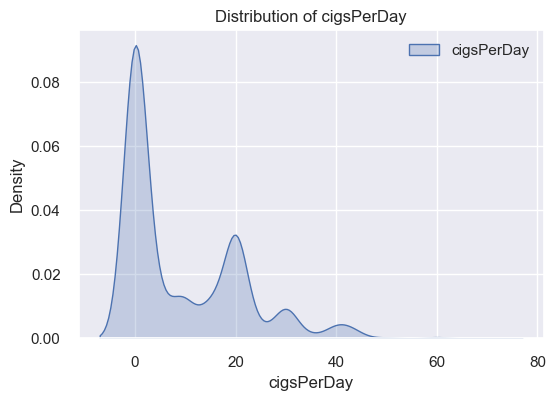

In [82]:
plt.figure(figsize=(6,4))
# plt.subplot()
plt.title('Distribution of cigsPerDay')
sns.kdeplot(df['cigsPerDay'],shade = True, label='cigsPerDay')
plt.legend()

In [83]:
df.cigsPerDay.fillna(df.cigsPerDay.mode()[0],inplace = True)

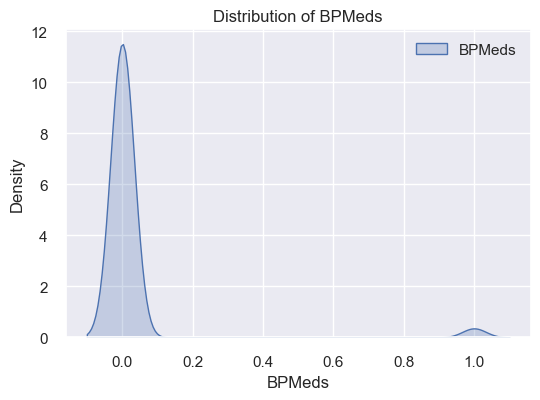

In [84]:
plt.figure(figsize=(6,4))
# plt.subplot()
plt.title('Distribution of BPMeds')
sns.kdeplot(df['BPMeds'],shade = True, label='BPMeds')
plt.legend()

In [85]:
df.BPMeds.fillna(df.BPMeds.ffill(),inplace = True)

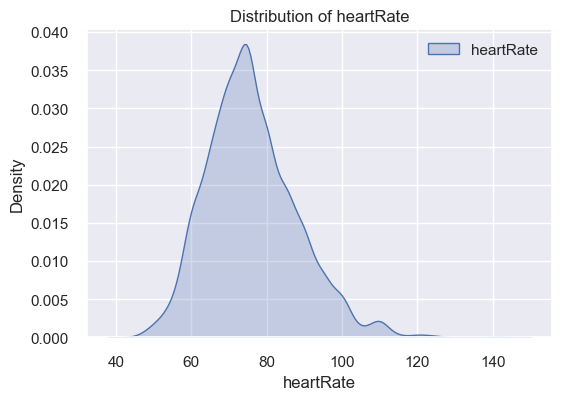

In [86]:
plt.figure(figsize=(6,4))
# plt.subplot()
plt.title('Distribution of heartRate')
sns.kdeplot(df['heartRate'],shade = True, label='heartRate')
plt.legend()

In [87]:
df.heartRate.fillna(df.heartRate.median(),inplace = True)

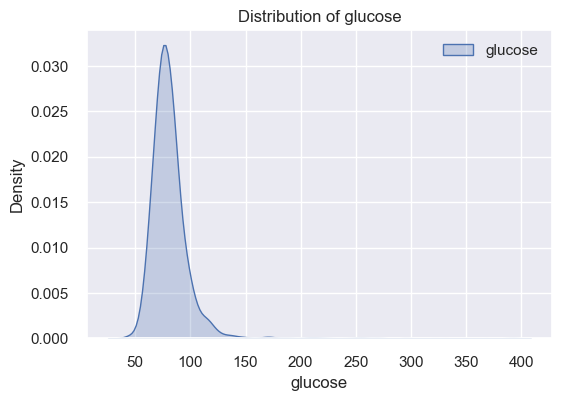

In [88]:
plt.figure(figsize=(6,4))
# plt.subplot()
plt.title('Distribution of glucose')
sns.kdeplot(df['glucose'],shade = True, label='glucose')
plt.legend()

In [89]:
df.glucose.fillna(df.glucose.median(),inplace = True)

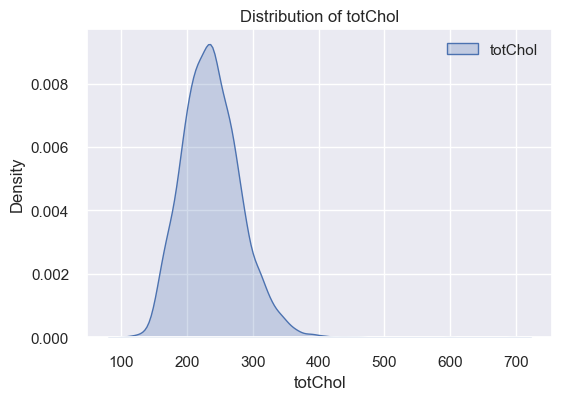

In [90]:
plt.figure(figsize=(6,4))
# plt.subplot()
plt.title('Distribution of totChol')
sns.kdeplot(df['totChol'],shade = True, label='totChol')
plt.legend()

In [91]:
df.totChol.fillna(df.totChol.median(),inplace = True)

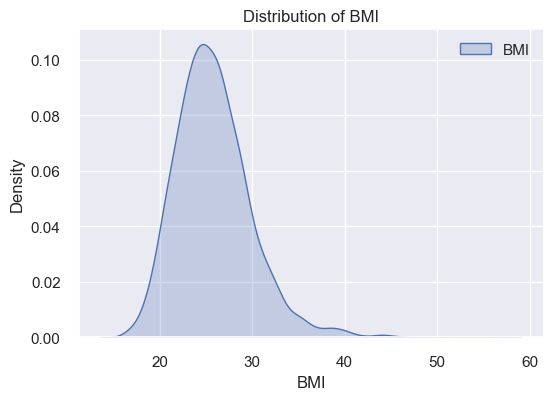

In [92]:
plt.figure(figsize=(6,4))
# plt.subplot()
plt.title('Distribution of BMI')
sns.kdeplot(df['BMI'],shade = True, label='BMI')
plt.legend()

In [93]:
df.BMI.fillna(df.BMI.mean(),inplace = True)

1. 'cigsPerDay' is a continuious feature and is in range between 1 to 50 so mode value is taken to fill the missing values
2. 'BPMeds' is whether the patient was in a BP medication or not having 0 or 1s and it is imbalanced So Ffill method used to fill missing values
3. 'heartrate', 'glucose','totChol' are continuous values and is normally distributed with positive skew so median value is used
4. 'BMI' is continuous float value and positively skewed, so mean value is used to fill missing values
    

# Feature Engineering - One Hot Encoding

In [94]:
df = pd.get_dummies(df,columns = ['sex'],drop_first = True)

In [95]:
df = df.rename(columns={'sex_M':'sex'})

# Descriptive Analysis

In [96]:
df.describe()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,49.542183,9.010619,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.794964,75.976991,81.720059,0.150737,0.432743
std,8.592878,11.862839,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.106939,11.970114,23.161265,0.357846,0.495529
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.400000,75.000000,78.000000,0.000000,0.000000
75%,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000,1.000000
max,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000,1.000000


# Outlier Treatment

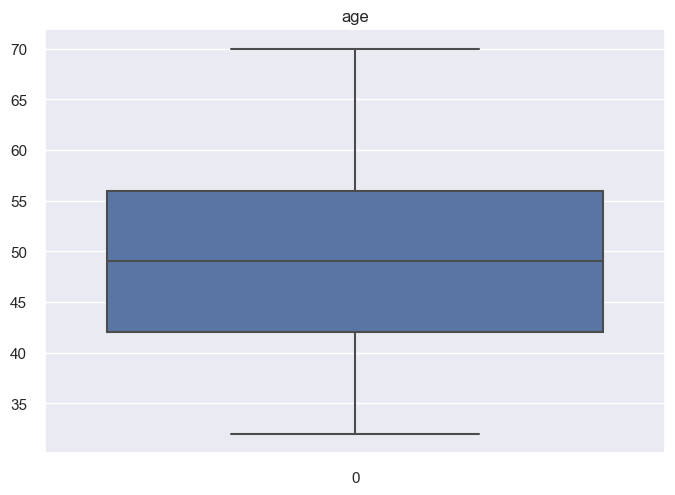

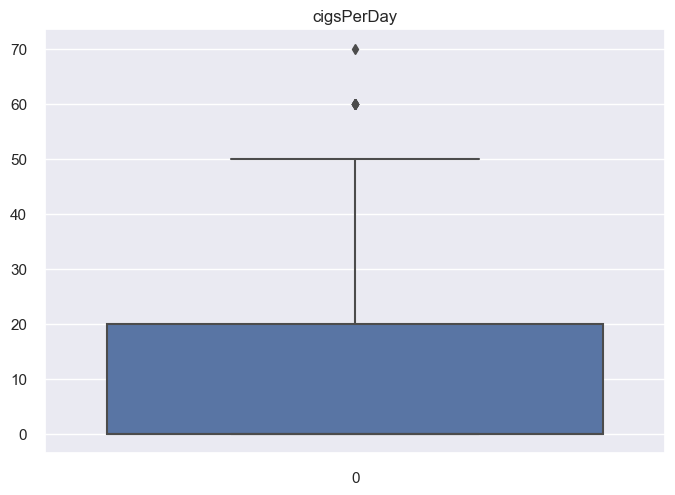

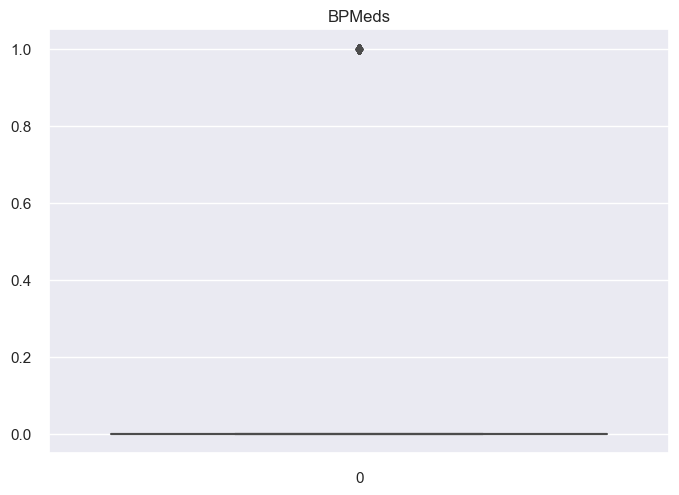

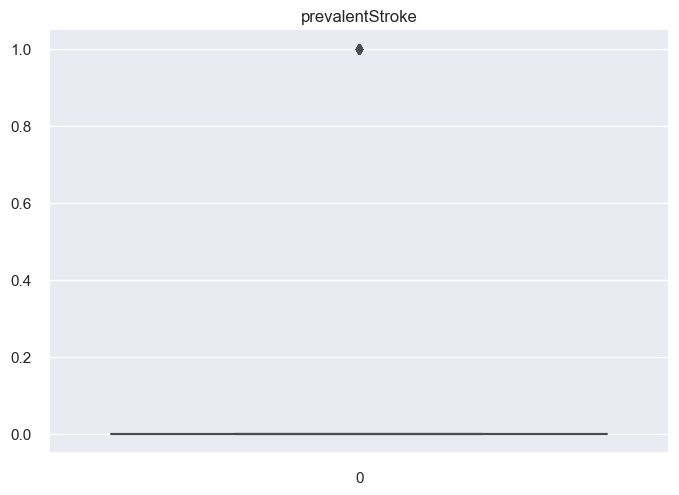

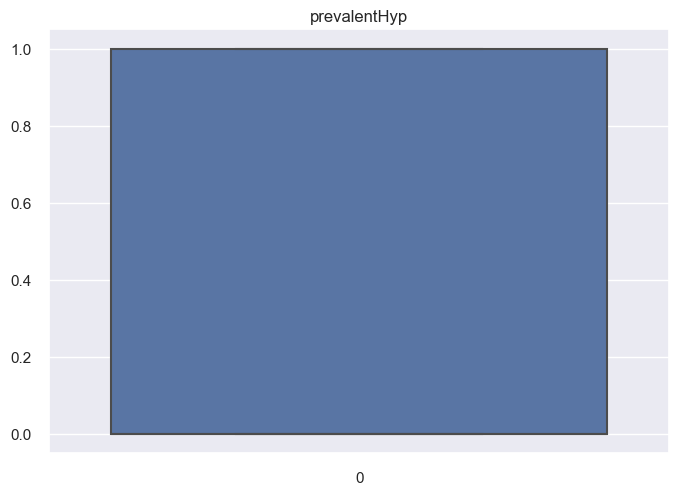

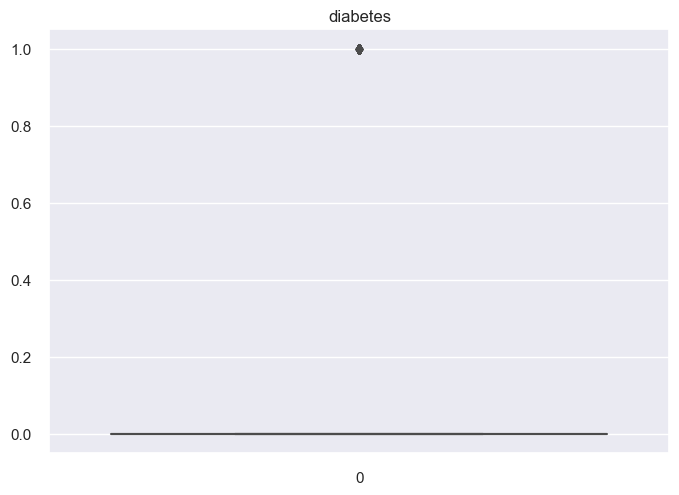

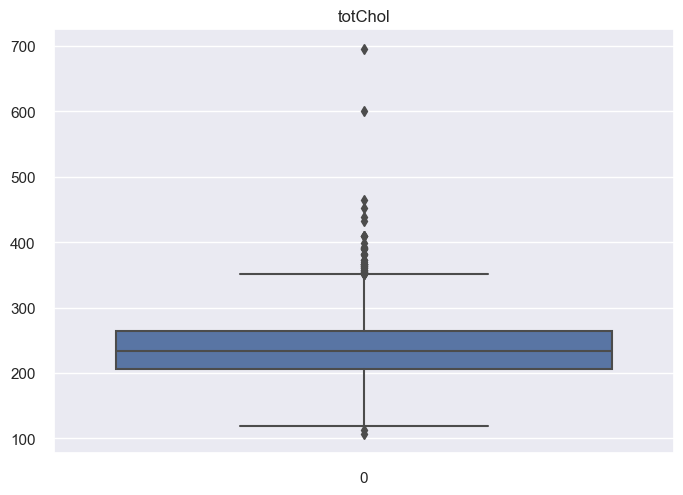

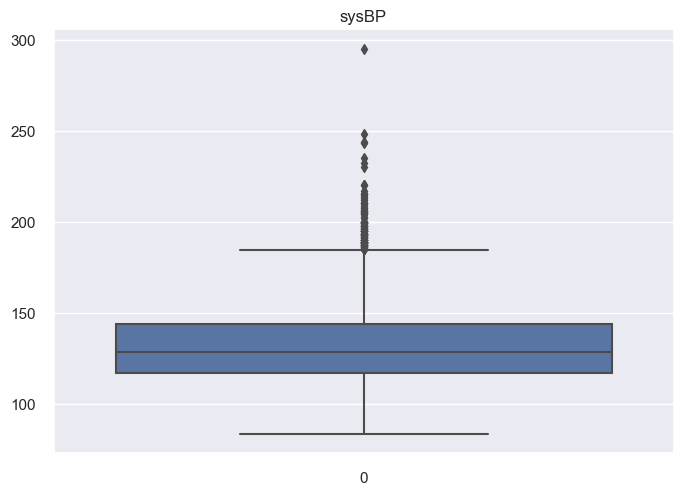

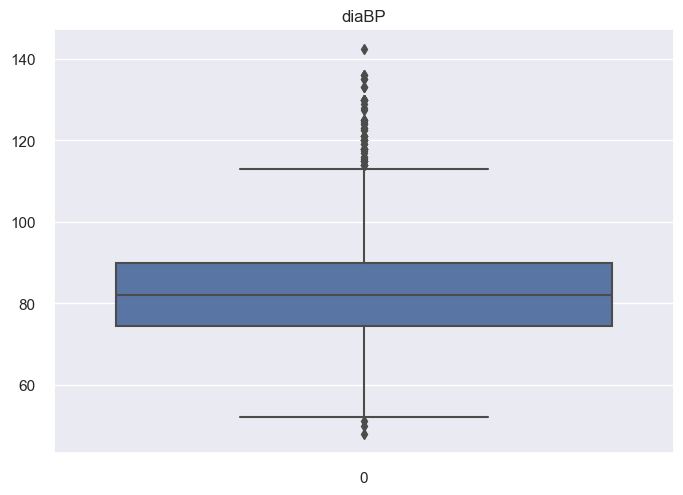

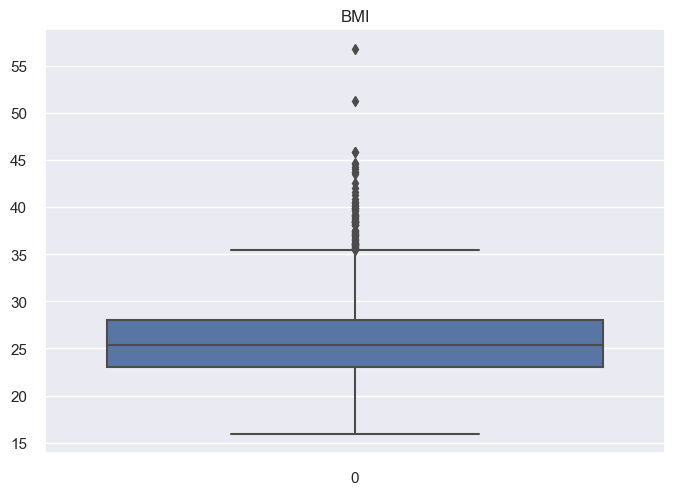

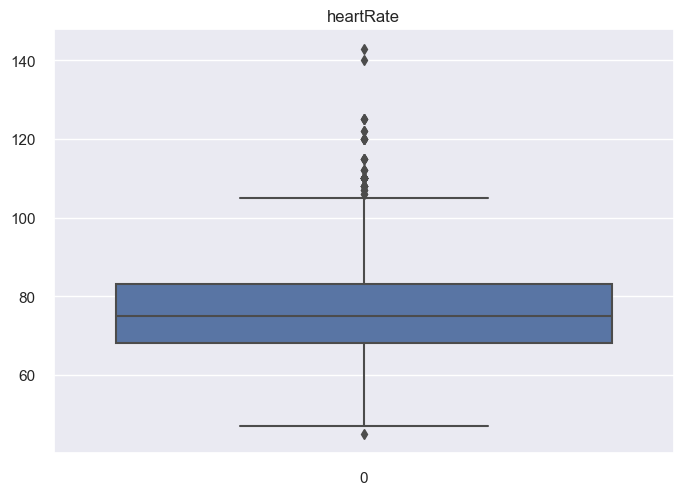

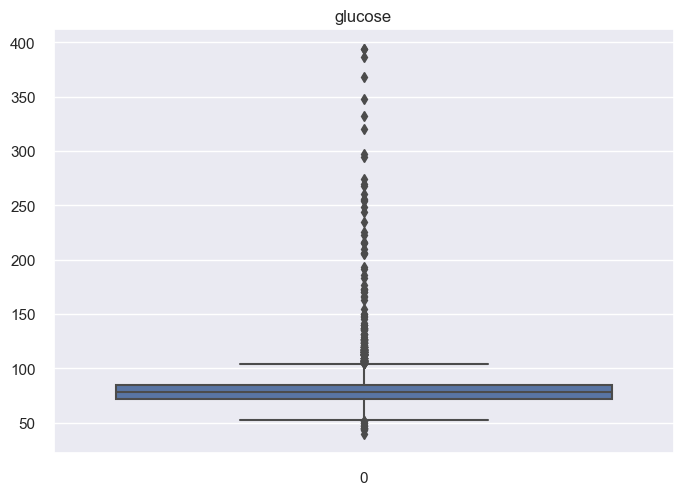

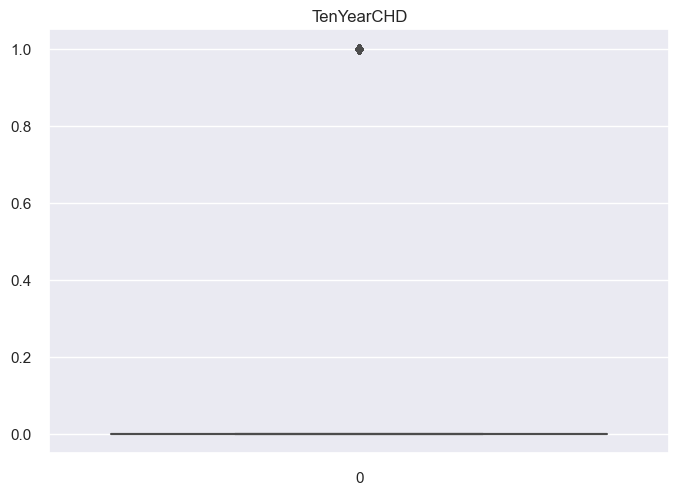

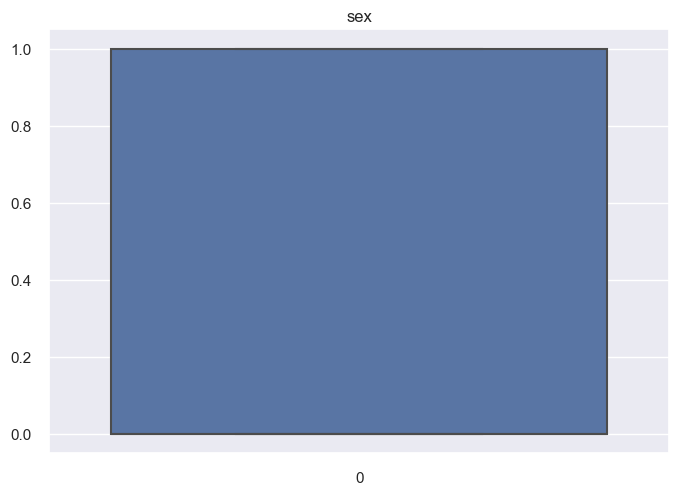

In [97]:
for i in df:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

We could see there are outliers present in cigsPerDay, totChol, BMI, sysBP as little bit abnormal. Other features are in range so no outlier treatment will be done.

In [98]:
df.cigsPerDay = np.where(df.cigsPerDay>50, 50,df.cigsPerDay)
df.totChol = np.where(df.totChol>450, 450,df.totChol)
df.BMI = np.where(df.BMI>50, 50,df.BMI)
df.sysBP = np.where(df.sysBP>250, 250,df.sysBP)

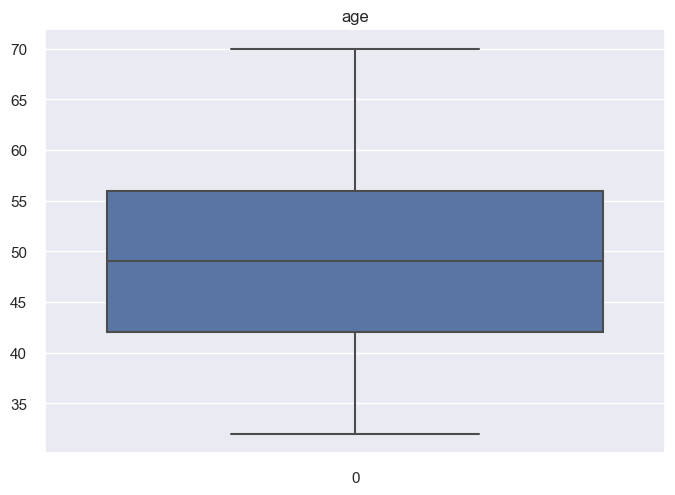

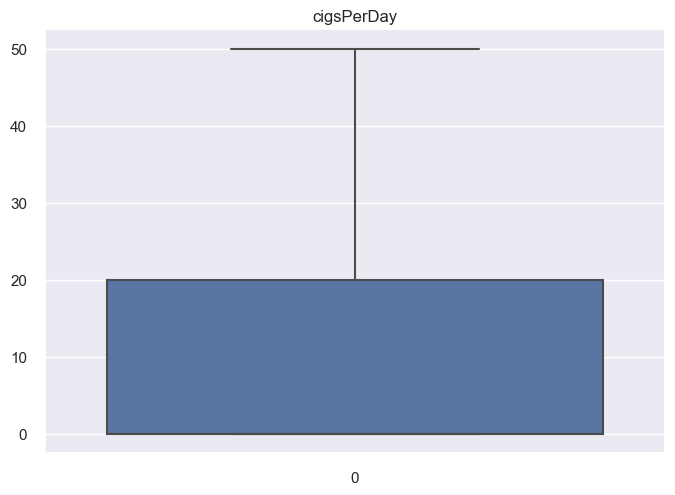

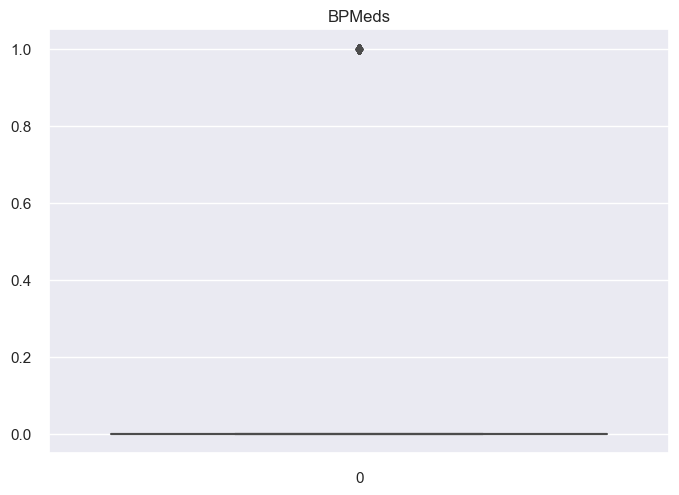

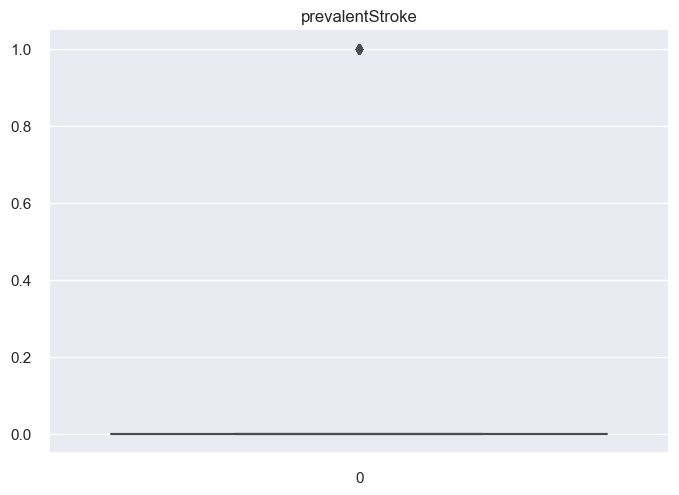

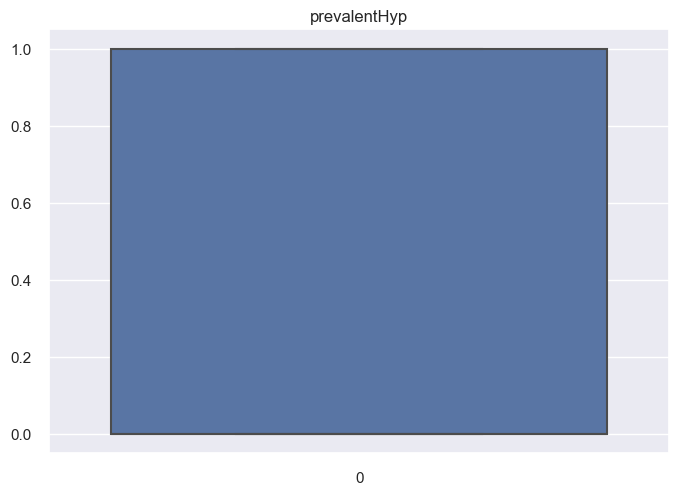

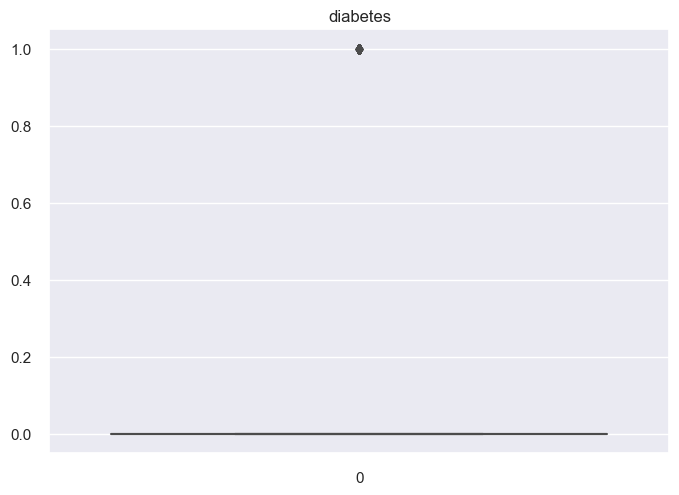

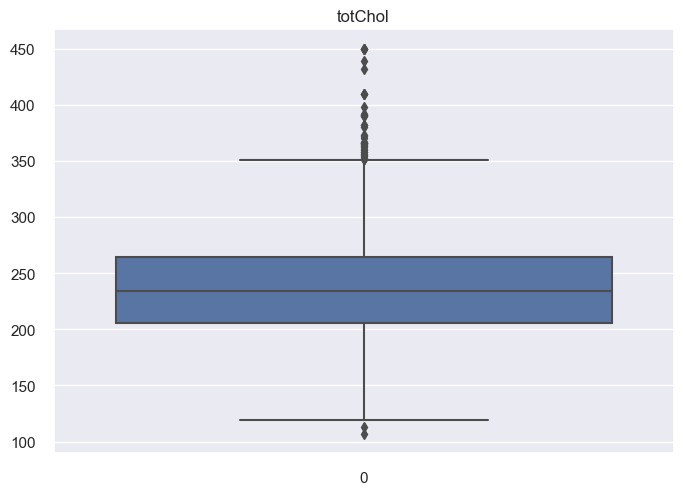

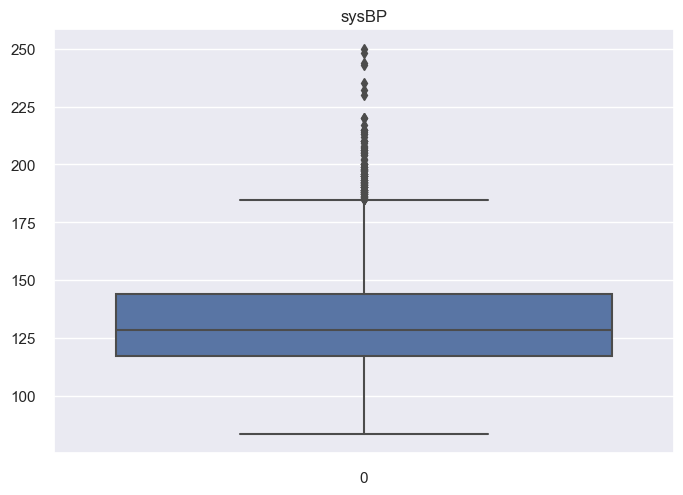

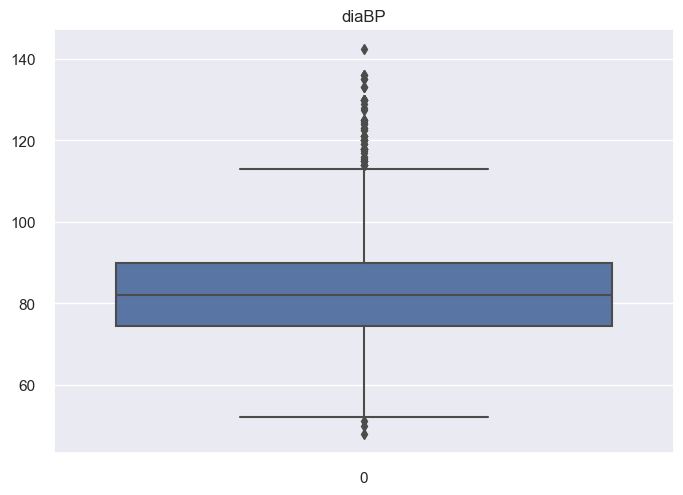

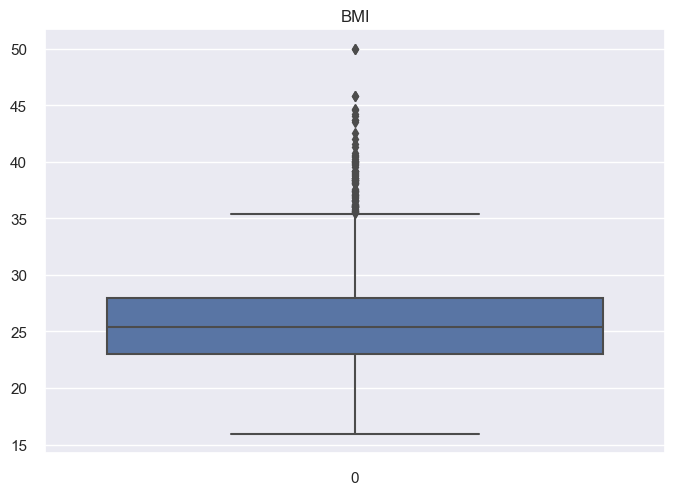

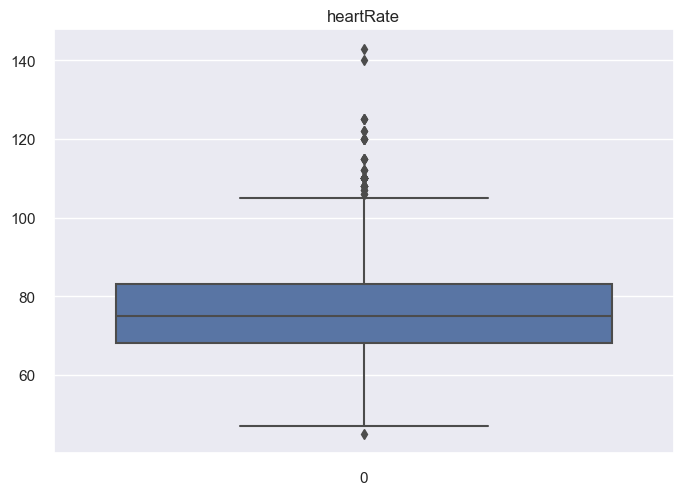

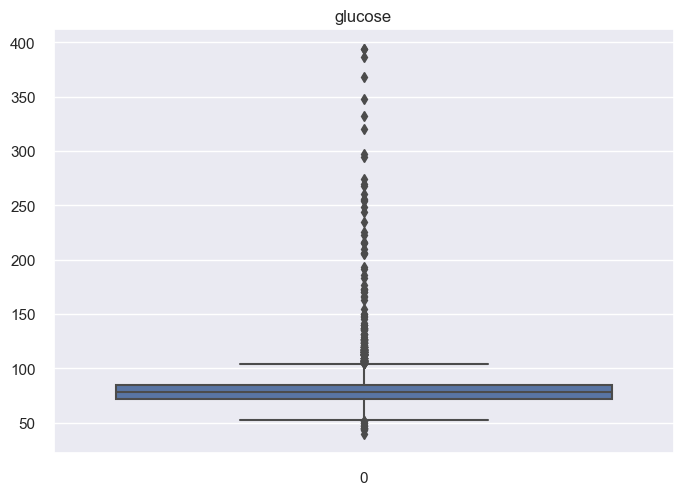

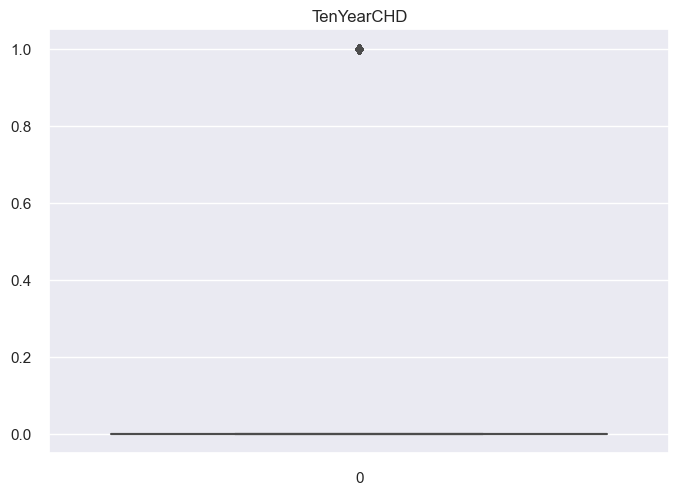

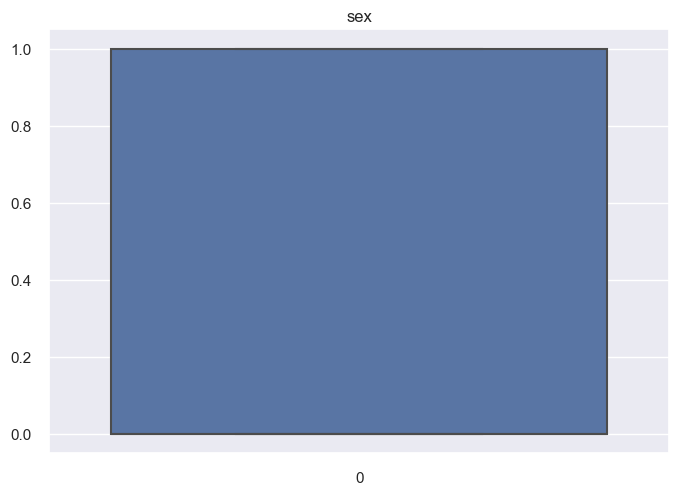

In [99]:
for i in df:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

We are not removing outliers completely instead partially reducing the spread of data to some extent so that we can reduce underfitting problem.

# Imbalance Data Treatment

In [100]:
import imblearn

In [101]:
df.columns

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'sex'],
      dtype='object')

In [102]:
x = df[['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'sex']]

In [106]:
x.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex
0,64,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,0
1,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,1
2,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [107]:
y = df['TenYearCHD']

In [108]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [109]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_over, y_over = over.fit_resample(x,y)

In [110]:
print(y_over.value_counts())
print(x_over.shape, y_over.shape)
print(x.shape, y.shape)

1    2879
0    2879
Name: TenYearCHD, dtype: int64
(5758, 13) (5758,)
(3390, 13) (3390,)


In [111]:
y_over.head()

0    1
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [112]:
x_over.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex
0,64,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,0
1,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,1
2,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [113]:
df1 = pd.concat([x_over,y_over],axis=1)

In [114]:
df1.tail()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex,TenYearCHD
5753,44,9.0,0.0,0,1,0,234.0,147.5,96.0,30.57,78.0,78.0,0,1
5754,63,25.0,0.0,0,1,0,203.0,192.5,125.0,26.18,80.0,83.0,1,1
5755,56,20.0,0.0,0,0,0,300.0,165.0,112.0,23.68,86.0,78.0,1,1
5756,59,0.0,1.0,0,1,0,201.0,148.5,90.0,25.85,65.0,83.0,0,1
5757,57,0.0,1.0,0,1,0,321.0,192.5,113.0,25.94,63.0,90.0,1,1


In [115]:
df1.shape

(5758, 14)

# Independent Variable Correlation check - Heatmap

<AxesSubplot: >

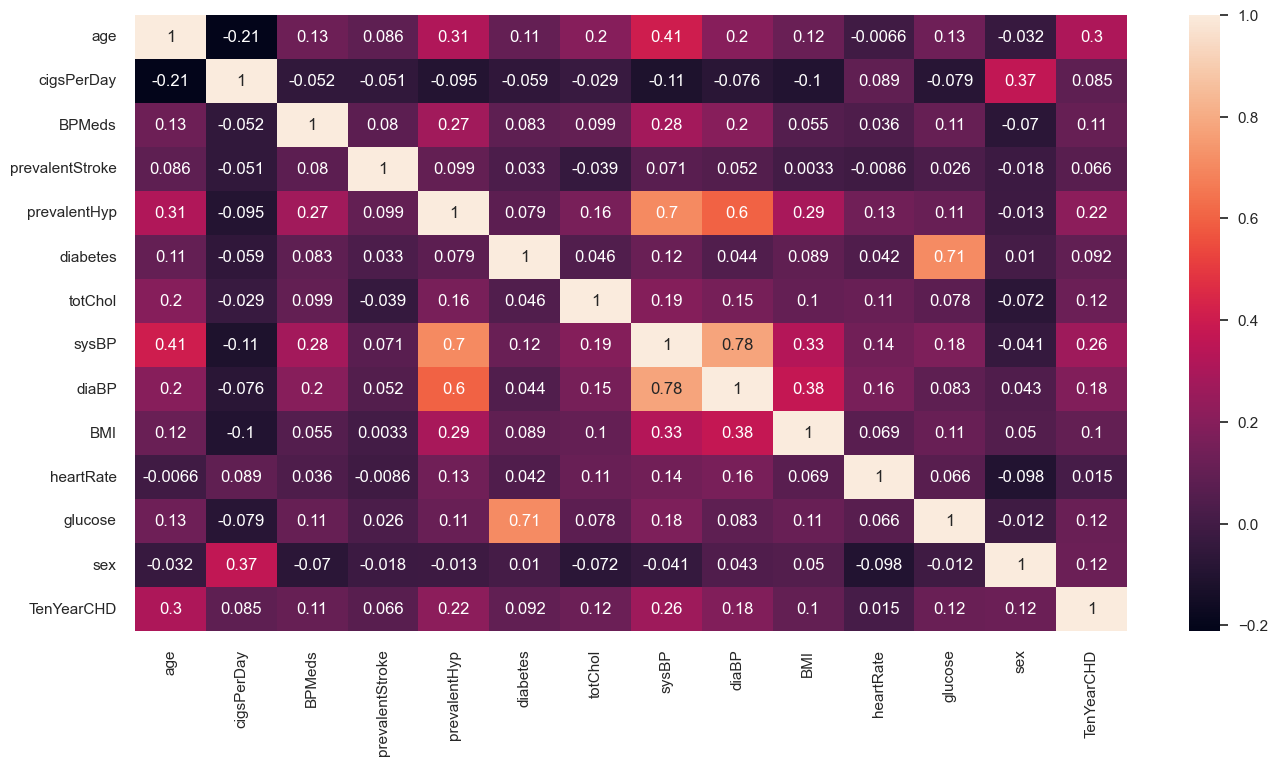

In [118]:
plt.figure(figsize=(16,8))

sns.heatmap(df1.corr(),annot = True)

From the above correlation, sysBP and diaBP are little bit correlated and also diabetes and glucose features are little bit correlated.
However they are not correlated above 80%. Thus no feature is removed.

In [45]:
# df1.to_csv('df11.csv')

# Exploratory Data Analysis

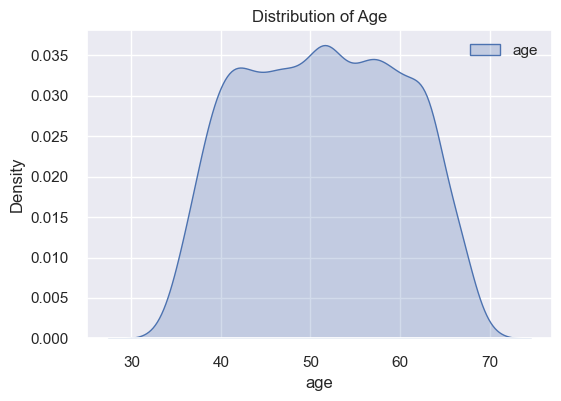

In [121]:
plt.figure(figsize=(6,4))
# plt.subplot()
plt.title('Distribution of Age')
sns.kdeplot(df1['age'],shade = True, label='age')
plt.legend()

<AxesSubplot: xlabel='sex', ylabel='TenYearCHD'>

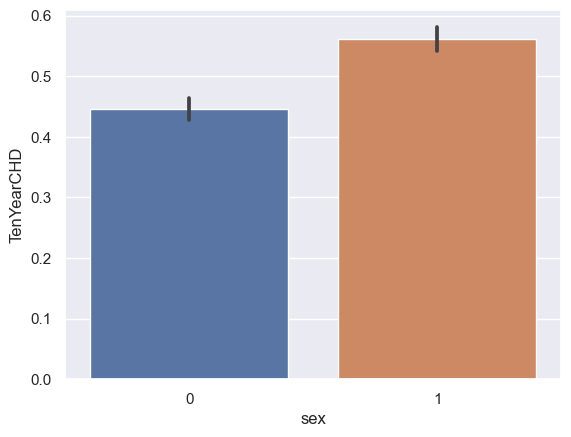

In [47]:
sns.barplot(data = df1,x='sex', y="TenYearCHD")

In [48]:
df1.columns

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'sex', 'TenYearCHD'],
      dtype='object')

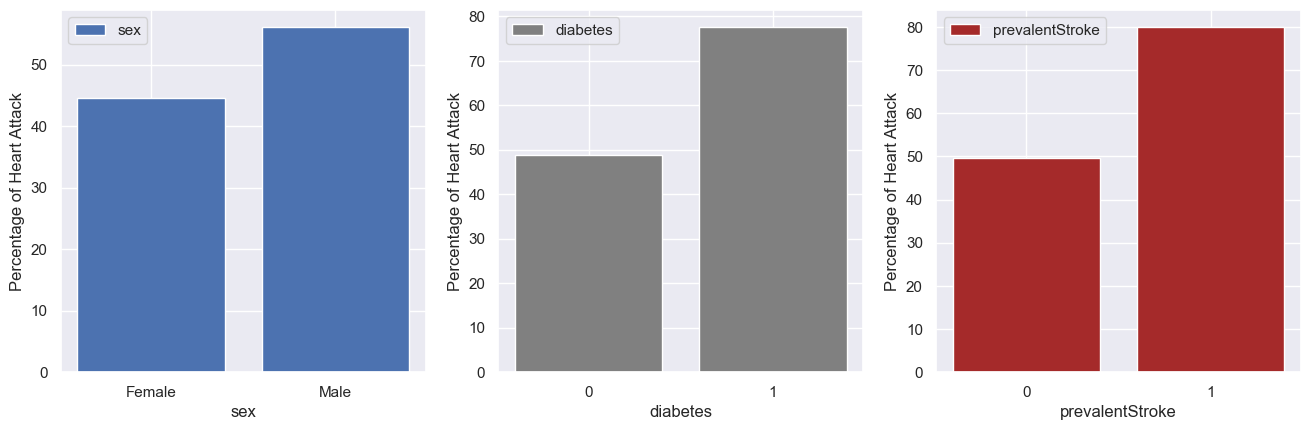

In [49]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(331)
df=df1
name='sex'
l = [(100)*df[df[name]==0]['TenYearCHD'].sum()/len(df[df[name]==0]['TenYearCHD']),
     (100)*df[df[name]==1]['TenYearCHD'].sum()/len(df[df[name]==1]['TenYearCHD'])]
x=["Female","Male"]
plt.bar(x,l,label=name )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()
fig = plt.subplot(332)
name='diabetes'
l = [(100)*df[df[name]==0]['TenYearCHD'].sum()/len(df[df[name]==0]['TenYearCHD']),
     (100)*df[df[name]==1]['TenYearCHD'].sum()/len(df[df[name]==1]['TenYearCHD'])]
x=["0","1"]
plt.bar(x,l,label='diabetes', color="grey" )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(333)
name='prevalentStroke'
l = [(100)*df[df[name]==0]['TenYearCHD'].sum()/len(df[df[name]==0]['TenYearCHD']),
     (100)*df[df[name]==1]['TenYearCHD'].sum()/len(df[df[name]==1]['TenYearCHD'])]
x=["0","1"]
plt.bar(x,l,label='prevalentStroke', color="brown" )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()


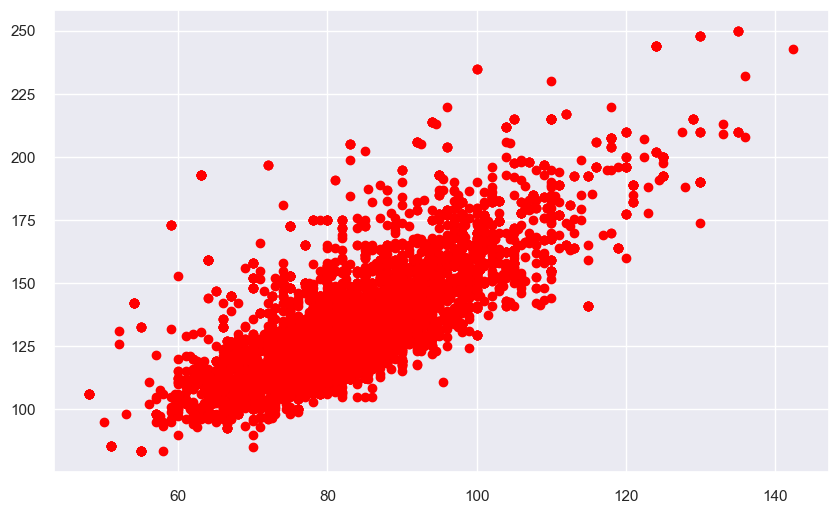

In [103]:
plt.figure(figsize= (10,6))
plt.scatter(x = df1['diaBP'],y = df1['sysBP'],c= 'red')
plt.show()

# Model Building

In [126]:
from pycaret.classification import *

In [127]:
exp_clf = setup(data=df1, target='TenYearCHD',fold_shuffle = True,session_id = 1,preprocess = False)

,Description,Value
0,Session id,1
1,Target,TenYearCHD
2,Target type,Binary
3,Original data shape,"(5758, 14)"
4,Transformed data shape,"(5758, 14)"
5,Transformed train set shape,"(4030, 14)"
6,Transformed test set shape,"(1728, 14)"
7,Numeric features,13


In [128]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9722,0.9933,0.9782,0.9668,0.9724,0.9444,0.9447,0.1730
rf,Random Forest Classifier,0.9558,0.9924,0.9762,0.9383,0.9567,0.9117,0.9127,0.1750
xgboost,Extreme Gradient Boosting,0.9208,0.9729,0.9663,0.8861,0.9243,0.8417,0.8455,0.1240
dt,Decision Tree Classifier,0.8911,0.8911,0.9807,0.8320,0.9001,0.7821,0.7954,0.0500
lightgbm,Light Gradient Boosting Machine,0.8851,0.9523,0.9424,0.8459,0.8914,0.7702,0.7757,0.1950
catboost,CatBoost Classifier,0.8541,0.9321,0.8963,0.8268,0.8600,0.7082,0.7111,0.7870
knn,K Neighbors Classifier,0.7618,0.8468,0.8670,0.7169,0.7844,0.5236,0.5364,0.2810
gbc,Gradient Boosting Classifier,0.7350,0.8156,0.7608,0.7239,0.7414,0.4700,0.4712,0.1460
ada,Ada Boost Classifier,0.6767,0.7434,0.6869,0.6733,0.6794,0.3534,0.3541,0.1040
lda,Linear Discriminant Analysis,0.6737,0.7286,0.6833,0.6704,0.6762,0.3473,0.3481,0.0610


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=1, verbose=0, warm_start=False)

In [129]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9677,0.9954,0.9900,0.9476,0.9684,0.9355,0.9364
1,0.9628,0.9867,0.9602,0.9650,0.9626,0.9256,0.9256
2,0.9727,0.9933,0.9801,0.9657,0.9728,0.9454,0.9455
3,0.9801,0.9957,0.9900,0.9707,0.9803,0.9603,0.9605
4,0.9677,0.9928,0.9851,0.9519,0.9682,0.9355,0.9361
5,0.9727,0.9817,0.9554,0.9897,0.9723,0.9454,0.9460
6,0.9727,0.9969,0.9802,0.9659,0.9730,0.9454,0.9455
7,0.9801,0.9985,0.9901,0.9709,0.9804,0.9603,0.9605
8,0.9628,0.9934,0.9604,0.9652,0.9628,0.9256,0.9256


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# Hypertune Model

In [131]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6551,0.7211,0.6766,0.6476,0.6618,0.3102,0.3106
1,0.6973,0.7733,0.7015,0.6946,0.6980,0.3946,0.3946
2,0.6278,0.7055,0.5920,0.6364,0.6134,0.2555,0.2561
3,0.6476,0.7138,0.6418,0.6482,0.6450,0.2953,0.2953
4,0.6824,0.7342,0.7065,0.6730,0.6893,0.3648,0.3653
5,0.7047,0.7541,0.6832,0.7150,0.6987,0.4095,0.4099
6,0.6576,0.7074,0.6881,0.6495,0.6683,0.3150,0.3156
7,0.6774,0.7467,0.7030,0.6698,0.6860,0.3548,0.3552
8,0.6998,0.7392,0.7376,0.6866,0.7112,0.3994,0.4005


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

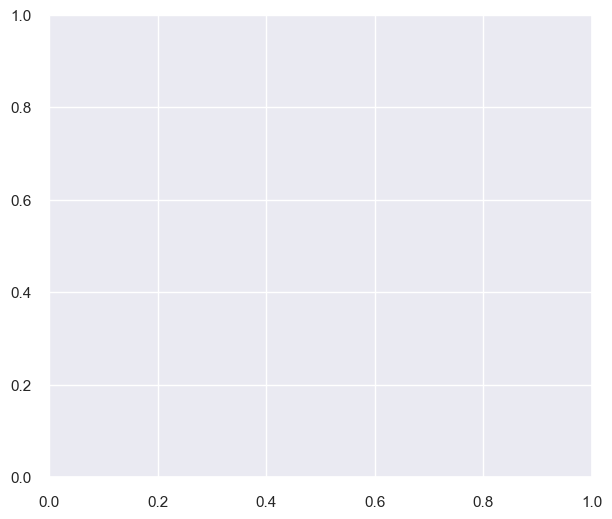

In [133]:
evaluate_model(et)

# Validate Model

In [134]:
predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9815,0.9984,0.9850,0.9782,0.9815,0.9630,0.9630


,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex,TenYearCHD,prediction_label,prediction_score
2140,56,17.0,0.0,0,0,0,177.0,127.0,79.0,20.120001,70.0,88.0,1,0,0,0.65
992,54,0.0,0.0,0,1,0,227.0,168.0,94.0,22.700001,75.0,70.0,0,0,0,0.69
2528,51,30.0,0.0,0,0,0,272.0,133.0,91.0,28.500000,72.0,78.0,0,0,0,0.82
3714,56,0.0,0.0,0,0,0,260.0,126.5,76.0,25.139999,58.0,70.0,1,1,1,1.00
844,46,20.0,0.0,0,1,0,197.0,144.0,78.0,22.510000,72.0,60.0,0,0,0,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,58,0.0,0.0,0,1,0,279.0,181.0,74.0,22.490000,66.0,65.0,1,0,0,0.69
2655,39,0.0,0.0,0,0,0,164.0,112.0,63.0,22.010000,60.0,85.0,0,0,0,0.98
4212,55,0.0,0.0,0,1,0,325.0,155.0,90.0,26.270000,68.0,72.0,0,1,1,1.00
1495,55,20.0,0.0,0,0,0,280.0,134.0,85.5,29.860001,80.0,75.0,1,0,0,0.73


# Conclusion

#### Extra Trees Model gives best result. As this is Medical dataset with Cardio Vascular Risk Prediction, 
#### We go for High Recall and High F1 score. Since Extra trees gives the best, I am concluding ET as final model.
#### Accuracy is 97.22%
#### Precision is 96.68%
#### Recall is 97.82%
#### F1_score is 97.24%